# Handling Data imbalance Classification Model 

For this lab we will build a model on customer churn binary classification problem. You will be using Data/DATA_Customer-Churn.csv file.

#### Scenario
You are working as an analyst with an internet service provider. You are provided with the historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data

churn_data = pd.read_csv('DATA_Customer-Churn.csv')

In [3]:
churn_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# overview numerical data
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# overview categorical data
churn_data.describe(exclude = 'number')

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,6531,2
top,Male,No,No,Yes,No,No,No,No,No,No,Month-to-month,,No
freq,3555,3641,4933,6361,3498,3088,3095,3473,2810,2785,3875,11,5174


In [7]:
# change the object types
churn_data.TotalCharges = pd.to_numeric(churn_data.TotalCharges, errors = 'coerce')

In [8]:
# checking for missing values
churn_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# cleaning data
 
def cleaning_data (df):
    df.rename(columns = {"SeniorCitizen": "senior_citizen","PhoneService":"phone_service", "OnlineSecurity":"online_security", "OnlineBackup":"online_backup", "DeviceProtection":"device_protection", "TechSupport":"tech_support","StreamingTV":"streaming_tv", "StreamingMovies":"streaming_movies", "MonthlyCharges":"monthly_charges","TotalCharges":"total_charges"}, inplace = True)
    df.columns = [i.lower() for i in df.columns]
    df = df.dropna()
    return df

In [10]:
churn_data = cleaning_data(churn_data)

In [11]:
churn_data.isnull().values.any()

False

In [12]:
# change relevant yes/no columns to binary logic

lb = LabelEncoder() 
churn_data['churn'] = lb.fit_transform(churn_data['churn'])

In [13]:
churn_data.churn.value_counts()

0    5163
1    1869
Name: churn, dtype: int64

#### Building a simple model without balancing the data

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

    * Scale the features either by using normalizer or a standard scaler.
    * Split the data into a training set and a test set.
    * Fit a logistic regression model on the training data.
    * Check the accuracy on the test data.

In [14]:
# spliting training and testing data

X = churn_data[["tenure", "senior_citizen", "monthly_charges", "total_charges"]]
y = churn_data['churn']

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20)

In [16]:
# fit a logistic regression model on the training data

log = LogisticRegression() 


scaler = PowerTransformer()

scaler.fit(X_train)

X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

log.fit(X_train_stand, y_train)

y_pred_train_log = log.predict(X_train_stand)
y_pred_test_log = log.predict(X_test_stand)

In [17]:
X_train_stand

array([[-0.44767751, -0.44162052, -1.5320057 , -0.97498184],
       [-1.64921363, -0.44162052, -0.65980435, -1.69369016],
       [ 0.49350804, -0.44162052,  1.04072808,  0.90059649],
       ...,
       [-1.5003016 ,  2.26438755,  0.2081932 , -1.24063747],
       [-0.44767751, -0.44162052,  0.33932563, -0.1355832 ],
       [ 0.2959413 , -0.44162052, -0.05873703,  0.40766049]])

,Error_metric,Train,Test
0,Accuracy,0.791644,0.792466
1,Precision,0.662050,0.601504
2,Recall,0.470781,0.462428


Confusion matrix for the train set:


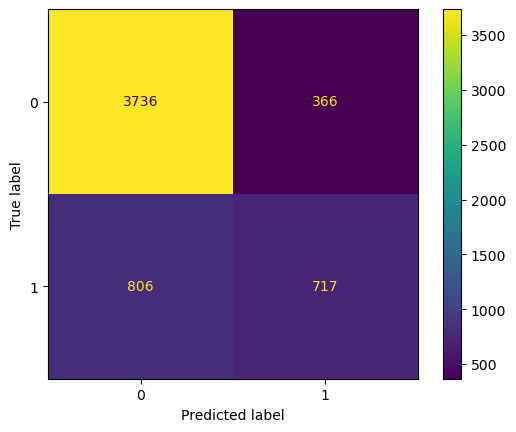

Confusion matrix for the test set:


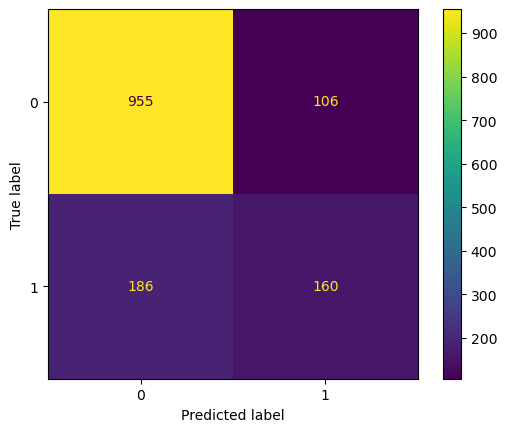

In [18]:
# check the accuracy on the test data

accuracy_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(accuracy_log)

print("Confusion matrix for the train set:")

plot_confusion_matrix(log,X_train_stand, y_train, values_format = 'd')
plt.show()

print("Confusion matrix for the test set:")

plot_confusion_matrix(log,X_test_stand,y_test, values_format = 'd')
plt.show()

#### Managing imbalance in the dataset

Check for imbalance.
Use the resampling strategies for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

In [19]:
y.value_counts() # imbalanced data

0    5163
1    1869
Name: churn, dtype: int64

In [20]:
5163/len(churn_data.churn)

0.7342150170648464

In [21]:
# create a function to fit and check the accuracy of the models

def eval_model (X,y):
    # TRAIN TEST SPLIT
        X_train, X_test, y_train, y_test = train_test_split(X,
                                                            y,
                                                            test_size = 0.2)
                                                        
    # SCALE                                                        
        scaler = PowerTransformer()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
    # MODEL TRAINING
        log = LogisticRegression() 
        log.fit(X_train, y_train)
        y_pred_test = log.predict(X_test)
        
    # EVALUATION
        score = accuracy_score(y_test, y_pred_test)
        print("The accuracy for the test data:", score)
        print("Confusion matrix for the test set:")
        plot_confusion_matrix(log,X_test_stand,y_test, values_format = 'd')
        plt.show()


##### Downsampling

In [22]:
#In downsampling, we randomly sample without replacement from the majority class

In [46]:
category_0 = churn_data[churn_data['churn'] == 0]
category_1 = churn_data[churn_data['churn'] == 1]

In [47]:
category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [48]:
data = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['churn'].value_counts()

0    1869
1    1869
Name: churn, dtype: int64

In [52]:
Xdata = data[["tenure", "senior_citizen", "monthly_charges", "total_charges"]]
y = churn_data['churn']

In [55]:
# model scores

#eval_model(Xdata, y)

##### Upsampling Method 1

In [ ]:
data = pd.concat([numerical, targets], axis=1)
data = data.drop(['TARGET_D'], axis=1)
category_0 = data[data['TARGET_B'] == 0]
category_1 = data[data['TARGET_B'] == 1]

In [ ]:
category_1 = category_1.sample(len(category_0), replace=True)
print(category_1.shape)

In [ ]:
data = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['TARGET_B'].value_counts()

##### Upsampling using SMOTE

- conda install -c conda-forge imbalanced-learn
- conda install -c glemaitre imbalanced-learn

The SMOTE algorithm can be broken down into following steps:

+ Randomly pick a point from the minority class.
+ Compute the k-nearest neighbors (for some pre-specified k) for this point.
+ Add k new points somewhere between the chosen point and each of its neighbors.

In [ ]:
smote = SMOTE()

In [ ]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis=1)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

##### Downsampling using Tomeklinks

+ TomekLinks are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.
+ It does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()